In [1]:
5+5

10

In [2]:
import os

path = "./muestras/nopal"
extetion = ".txt"
files = []

for r, d, f in os.walk(path):
    for file in f:
        if extetion in file:
            files.append(r+'/'+file)

del r, d, f, file, path, extetion

files.sort()
files

['./muestras/nopal/inside_prf_01.txt',
 './muestras/nopal/inside_prf_02.txt',
 './muestras/nopal/inside_prf_03.txt',
 './muestras/nopal/inside_prf_04.txt',
 './muestras/nopal/inside_prf_05.txt',
 './muestras/nopal/inside_prf_06.txt',
 './muestras/nopal/inside_prf_07.txt',
 './muestras/nopal/inside_prf_08.txt',
 './muestras/nopal/inside_prf_09.txt',
 './muestras/nopal/inside_prf_10.txt',
 './muestras/nopal/inside_prf_11.txt',
 './muestras/nopal/inside_prf_12.txt',
 './muestras/nopal/inside_prf_13.txt',
 './muestras/nopal/inside_prf_14.txt',
 './muestras/nopal/inside_prf_15.txt',
 './muestras/nopal/inside_prf_16.txt',
 './muestras/nopal/inside_prf_17.txt',
 './muestras/nopal/inside_prf_18.txt',
 './muestras/nopal/inside_prf_19.txt',
 './muestras/nopal/inside_prf_20.txt',
 './muestras/nopal/inside_prf_21.txt',
 './muestras/nopal/inside_prf_22.txt']

19
03.07.2023 14:49:21


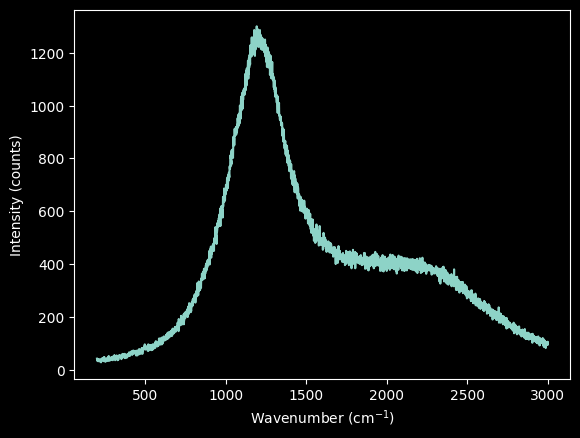

<Figure size 640x480 with 0 Axes>

In [5]:
# We pick a random file to test the class
from core import *
from random import randint

ind = randint(0,len(files)-1)
print(ind)
file = files[ind]

raman = RamanSpectrum(file)
print(raman.metadata['Acquired'])
raman.plot()

In [6]:
print('PATH             ', 'ACQUIRED', sep='\t')
print('----             ', '--------', sep='\t')

ramanspecs = {}

for f in files:
    r = RamanSpectrum(f)
    ramanspecs[r.acquired.split('_')[1]] = r
    print(r.filepath, r.acquired, sep='\t')

del r, f

PATH             	ACQUIRED
----             	--------
./muestras/nopal/inside_prf_01.txt	03072023_14:11:18
./muestras/nopal/inside_prf_02.txt	03072023_14:12:29
./muestras/nopal/inside_prf_03.txt	03072023_14:13:55
./muestras/nopal/inside_prf_04.txt	03072023_14:16:20
./muestras/nopal/inside_prf_05.txt	03072023_14:21:56
./muestras/nopal/inside_prf_06.txt	03072023_14:23:55
./muestras/nopal/inside_prf_07.txt	03072023_14:27:17
./muestras/nopal/inside_prf_08.txt	03072023_14:29:25
./muestras/nopal/inside_prf_09.txt	03072023_14:31:12
./muestras/nopal/inside_prf_10.txt	03072023_14:32:58
./muestras/nopal/inside_prf_11.txt	03072023_14:35:02
./muestras/nopal/inside_prf_12.txt	03072023_14:37:09
./muestras/nopal/inside_prf_13.txt	03072023_14:42:01
./muestras/nopal/inside_prf_14.txt	03072023_14:43:02
./muestras/nopal/inside_prf_15.txt	03072023_14:44:14
./muestras/nopal/inside_prf_16.txt	03072023_14:45:14
./muestras/nopal/inside_prf_17.txt	03072023_14:46:10
./muestras/nopal/inside_prf_18.txt	03072023_1

In [7]:
# Este metodo proporcina una vista del ajuste para el comportamiento de la señal Raman a gran escala
# una vez restado este ajuste se puede concentrar la atención en los picos de frecuencia mas pequeños

# Es posible hacer el ajuste por polinomios o por gaussianas. Como metodo adicional se incluye el ajuste sav_gol

raman.interactive(mod=True, method='fit_gauss')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

AttributeError: 'RamanSpectrum' object has no attribute 'croppedx'

In [13]:
for k,v in ramanspecs.items():
    v.crop(100,1600)

<Figure size 640x480 with 0 Axes>

Peak 1: Amplitude=29988.4980823979, Mean=1502.0852505644855, Stddev=84.11235400609546
Peak 2: Amplitude=39529378.71379449, Mean=-5808035.4076527, Stddev=1563479.9440954898


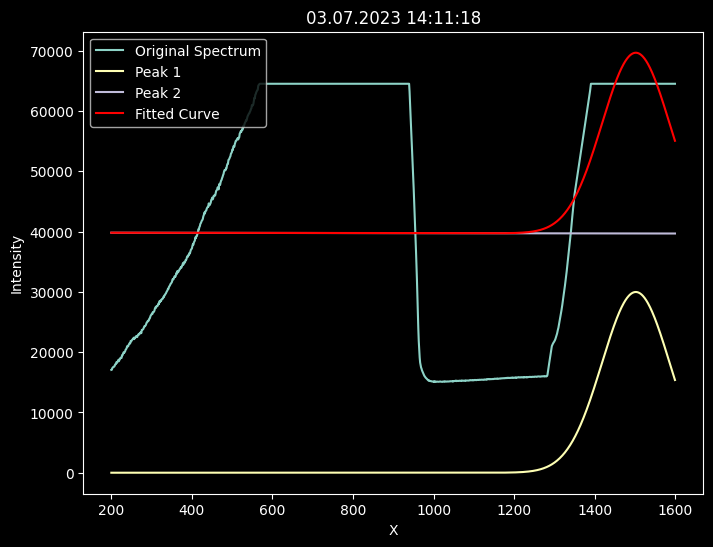

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

In [16]:
for k,v in ramanspecs.items():
    # Here we try to fit the data and catch the error if it fails
    try:
        v.fitgaussians(pair='cropped', initial_guess=[100,1000,100,100,2000,100])
    # Breaking down the error to catch the specific one
    except ValueError as e:
        print(k)
        print(e)
        

In [ ]:
for k, v in ramanspecs.items():
    v.interactive(mod=True, method='poly_fit')

In [10]:
ramanspecs['14:46:10'].interactive(mod=True, method='fit_gauss')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

In [12]:
los2n = lambda x: [float(i) for i in x]
xx = ['652', '1192', '260', '10', '2000', '200']

nm = los2n(xx)

nm


[652.0, 1192.0, 260.0, 10.0, 2000.0, 200.0]

Peak 1: Amplitude=602.032748676461, Mean=1164.6949566307267, Stddev=152.06103716403683
Peak 2: Amplitude=193.18893025290836, Mean=1640.5205825018027, Stddev=783.7118961827164


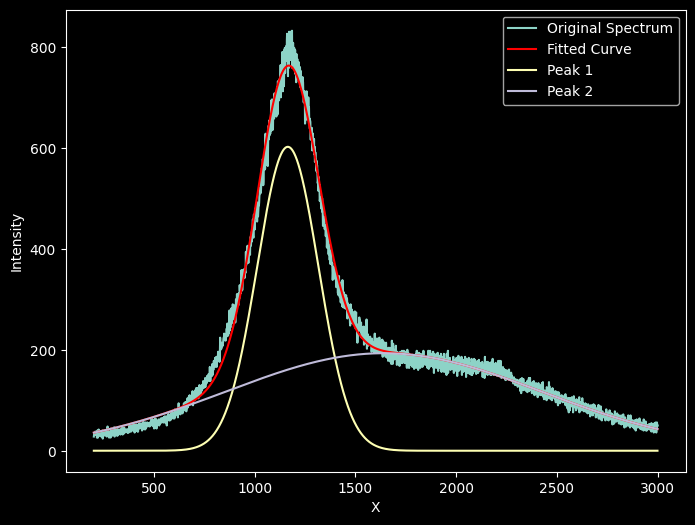

In [13]:
ramanspecs['14:46:10'].fitgaussians(pair='raw', initial_guess=nm)

14:11:18 no se pudo ajustar
Peak 1: Amplitude=3760.1711551574526, Mean=1181.4435328087034, Stddev=152.4325962989901
Peak 2: Amplitude=3239.158939602892, Mean=1448.955507581279, Stddev=-579.0195819223484
Peak 3: Amplitude=502.5418548773628, Mean=2025.3555627906117, Stddev=114.98463490475109


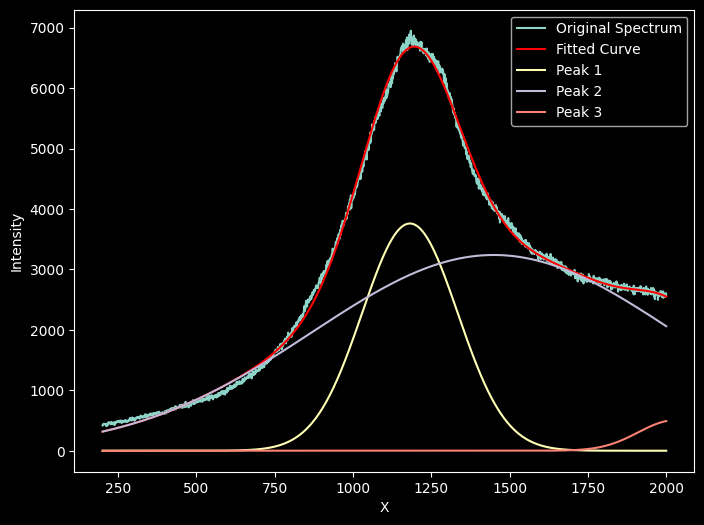

Peak 1: Amplitude=-867.1006399547389, Mean=1012.0510213731951, Stddev=95.16393927859022
Peak 2: Amplitude=3500.1003585313347, Mean=1709.0210335550757, Stddev=731.4934547630272
Peak 3: Amplitude=5292.694199380199, Mean=1164.2417352337434, Stddev=181.5660483028899


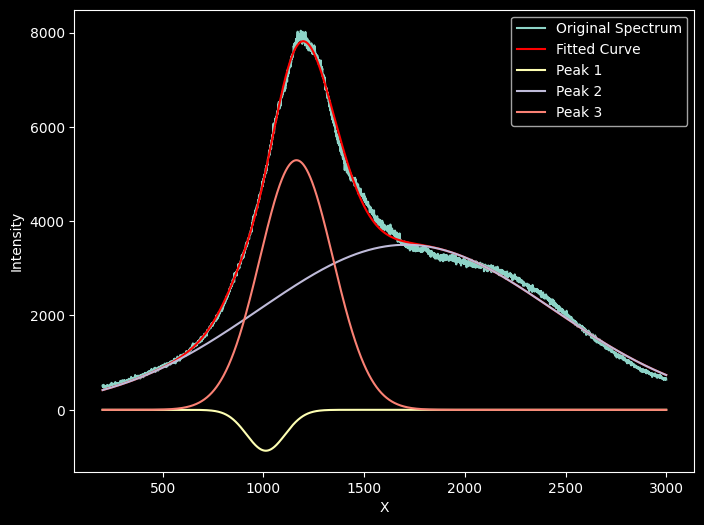

/home/jupyter/anaconda3/envs/ramanconda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak 1: Amplitude=38703.53102965813, Mean=1186.678579222747, Stddev=190.1279716347666
Peak 2: Amplitude=5948.524962878931, Mean=15371.246319463336, Stddev=-1622.3365687120058
Peak 3: Amplitude=25676.397528373902, Mean=1749.6939221484972, Stddev=731.3816580762644


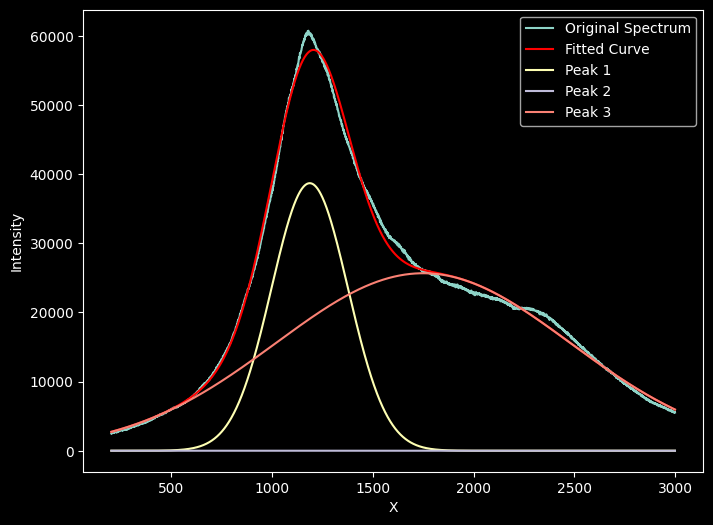

Peak 1: Amplitude=932.0848054623089, Mean=1166.6426433471408, Stddev=169.52081761775827
Peak 2: Amplitude=549.3903668851221, Mean=1685.4886269890994, Stddev=1012.3276806266118
Peak 3: Amplitude=-74.67510728233874, Mean=2882.8363085978185, Stddev=-184.19694185423873


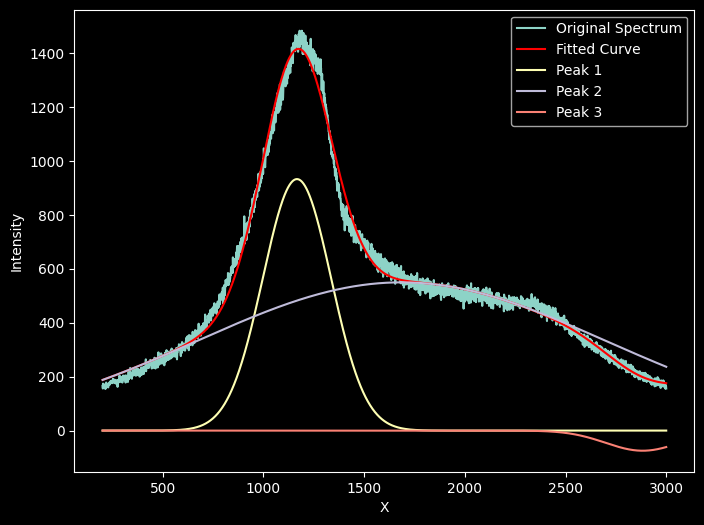

14:23:55 no se pudo ajustar
Peak 1: Amplitude=38556.58839587646, Mean=1182.9093961012218, Stddev=138.25222289079463
Peak 2: Amplitude=13422.566679372296, Mean=1331.6973844146617, Stddev=-873.1119298797371
Peak 3: Amplitude=-6993.778241025893, Mean=436.6320736624703, Stddev=230.9247435134566


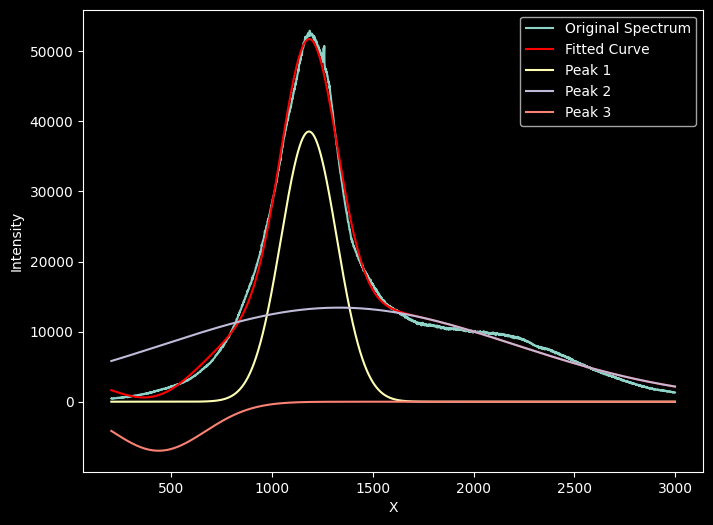

Peak 1: Amplitude=11315.851975449132, Mean=1181.7171270582367, Stddev=123.0047541647405
Peak 2: Amplitude=9141.933836979984, Mean=1168.5475733555215, Stddev=-300.278524487921
Peak 3: Amplitude=4577.541420801197, Mean=2033.6525945952767, Stddev=499.7444260659661


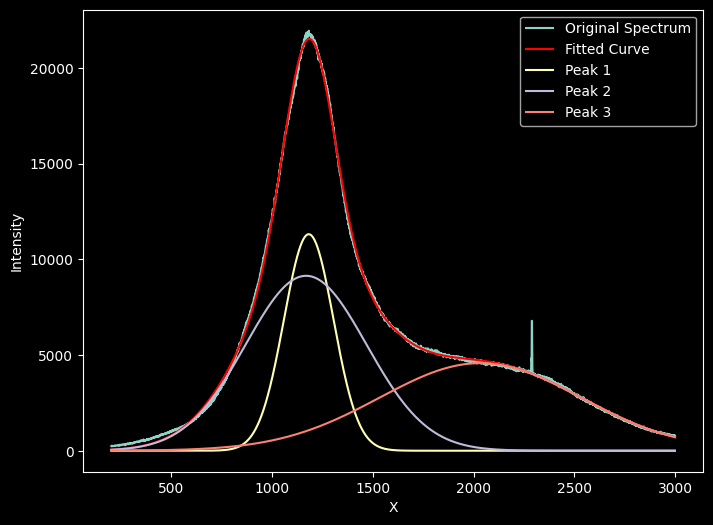

Peak 1: Amplitude=55292.92922841174, Mean=1128.070059310924, Stddev=212.7260507089757
Peak 2: Amplitude=-5152.64413150183, Mean=2688.530972650177, Stddev=434.9630117133705
Peak 3: Amplitude=18805.58747008299, Mean=1804.7505980304218, Stddev=-848.2080841565904


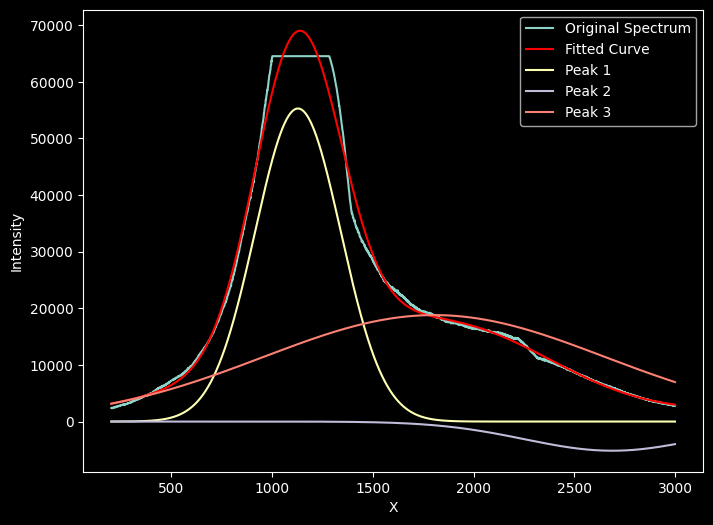

Peak 1: Amplitude=594.920761959282, Mean=1155.5793792533673, Stddev=170.02763119976666
Peak 2: Amplitude=351.51070542314494, Mean=1763.828900735433, Stddev=841.0030354465191
Peak 3: Amplitude=136.87912607181272, Mean=1465.2935851849563, Stddev=118.52996126694924


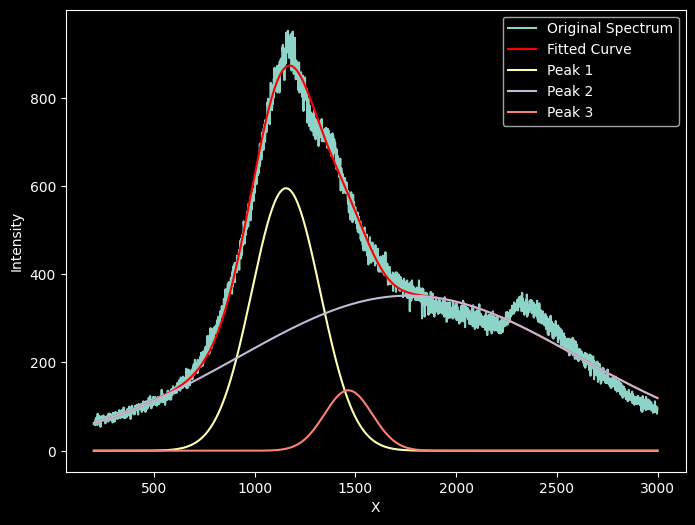

Peak 1: Amplitude=785.4598307405328, Mean=1156.960207561418, Stddev=79.18121894073175
Peak 2: Amplitude=983.800699378043, Mean=1807.5440761239054, Stddev=676.3514209470686
Peak 3: Amplitude=2161.0155833834615, Mean=1182.1682690767452, Stddev=210.73850616129957


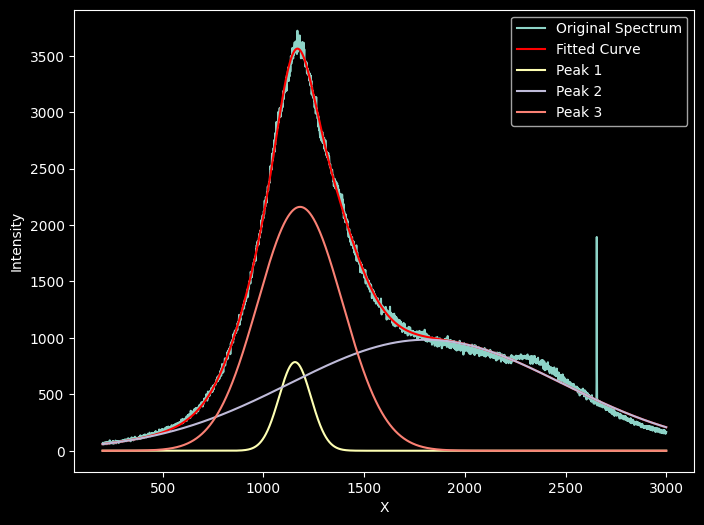

14:37:09 no se pudo ajustar
Peak 1: Amplitude=257.1949104463542, Mean=1168.9200713752184, Stddev=152.10695798227403
Peak 2: Amplitude=79.19230155665686, Mean=2464.556190093424, Stddev=394.74472056416494
Peak 3: Amplitude=142.34571449903018, Mean=1389.6945156839186, Stddev=586.2415985850034


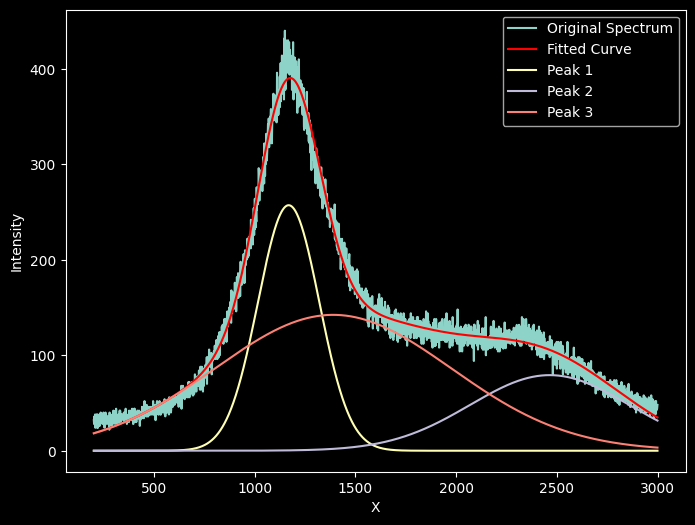

Peak 1: Amplitude=364.90589653739585, Mean=1174.5976537681772, Stddev=147.50373091028854
Peak 2: Amplitude=129.14316361770128, Mean=2336.0121701022686, Stddev=429.962167590427
Peak 3: Amplitude=188.91869649190488, Mean=1301.1303941671185, Stddev=487.46935417753843


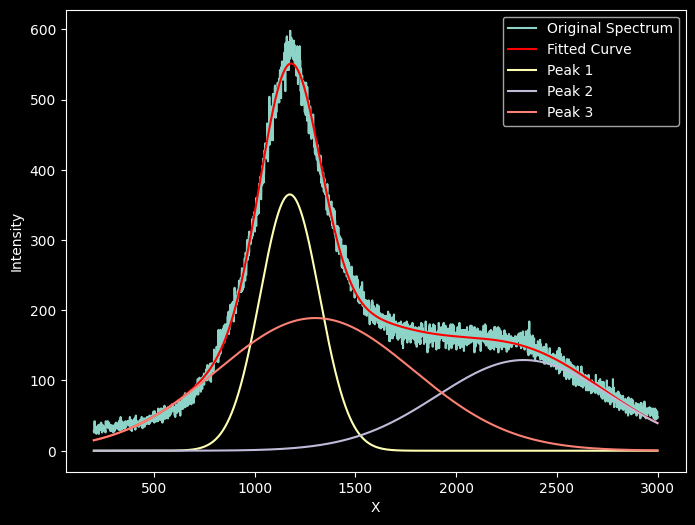

14:44:14 no se pudo ajustar
14:45:14 no se pudo ajustar
14:46:10 no se pudo ajustar
14:47:03 no se pudo ajustar
Peak 1: Amplitude=186.66875711650664, Mean=1198.7685747956382, Stddev=174.6003546983274
Peak 2: Amplitude=17.517915118707958, Mean=2404.5834145357053, Stddev=110.58430609538166
Peak 3: Amplitude=118.87845141942859, Mean=1748.4178211018705, Stddev=855.2647920891928


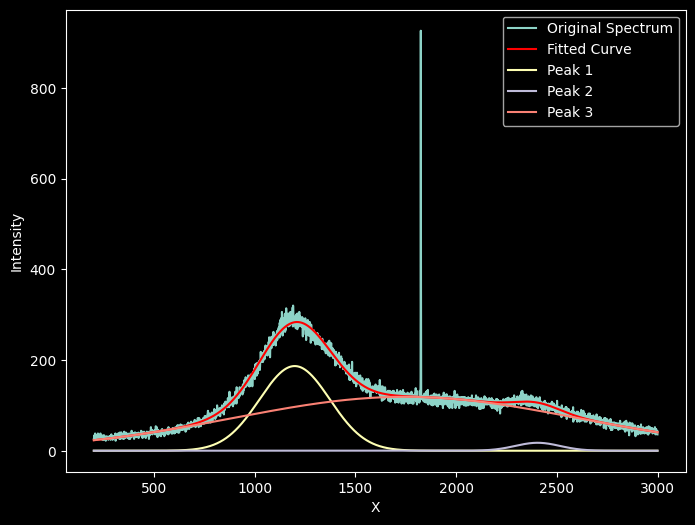

14:49:21 no se pudo ajustar
14:50:16 no se pudo ajustar
14:51:10 no se pudo ajustar


In [6]:
for k,v in ramanspecs.items():
    try:
        v.fitgaussians(pair='raw')
    except:
        print(k, 'no se pudo ajustar')

In [8]:
ramanspecs['14:44:14'].interactive(mod=True, method='fit_gauss')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

In [7]:
plotraman = lambda x: ramanspecs[x].plot()
plotraman('13:27:24')

borrardeldic = lambda keey: ramanspecs.pop(keey)
borrardeldic('13:27:24')

KeyError: '13:27:24'

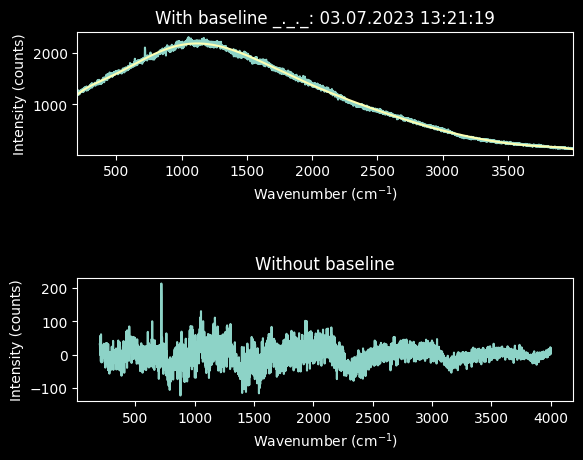

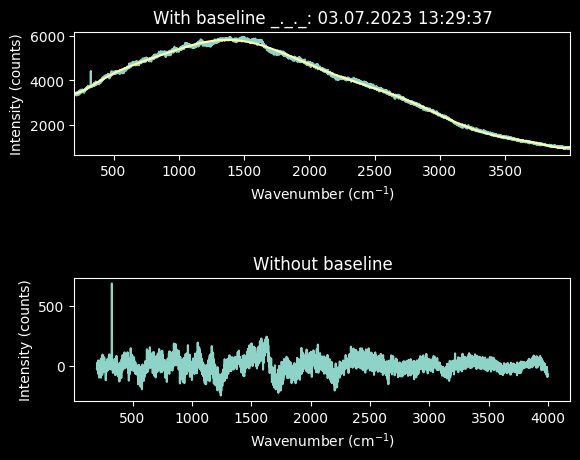

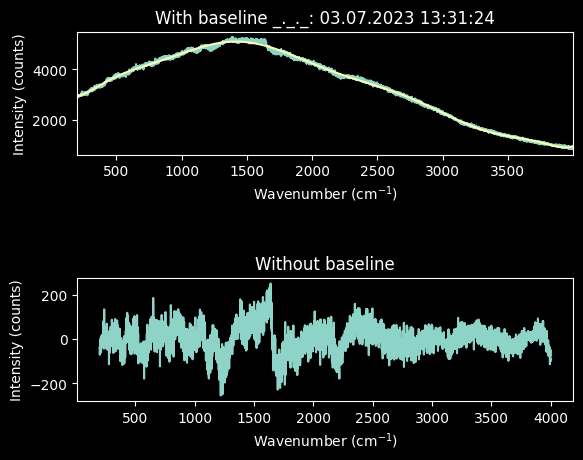

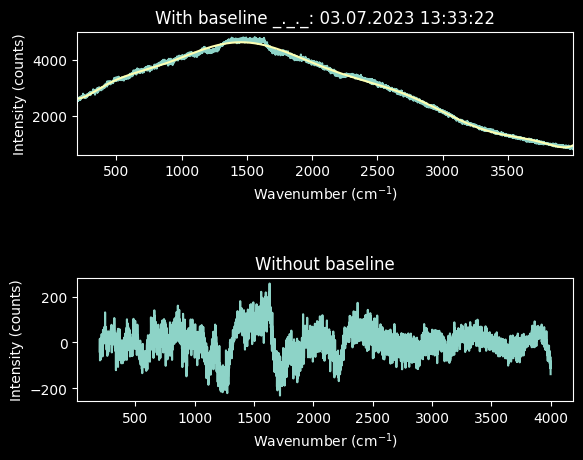

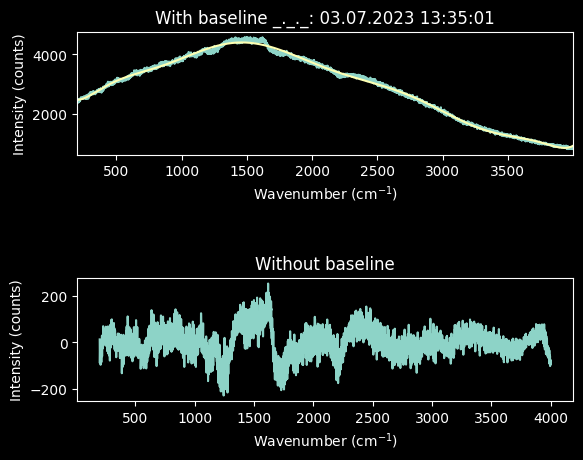

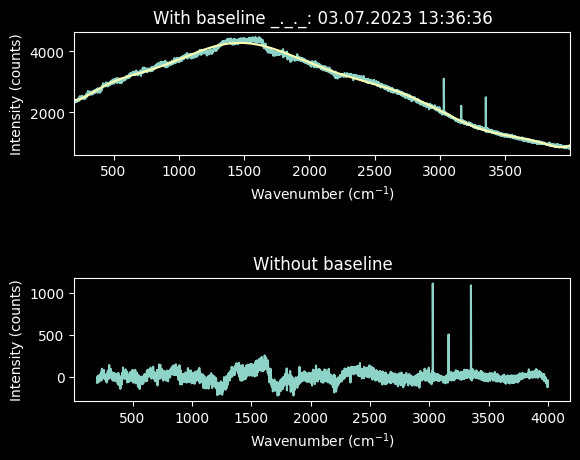

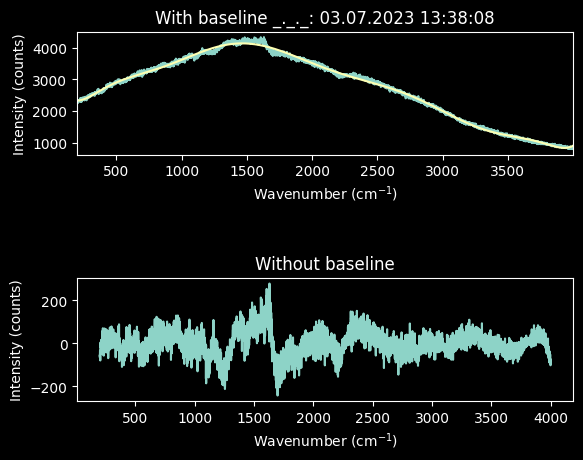

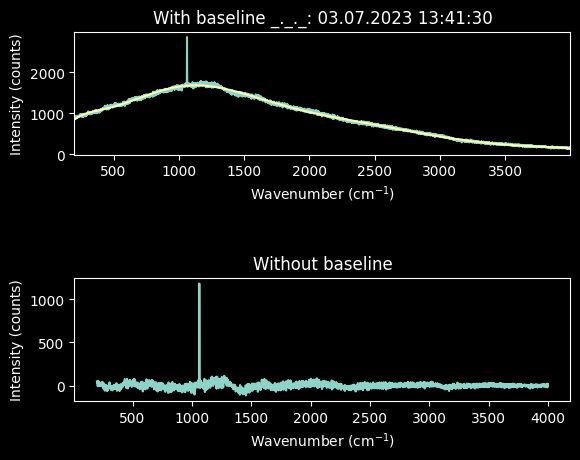

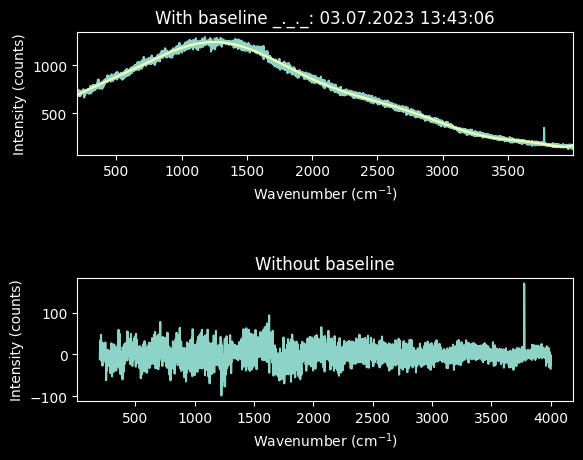

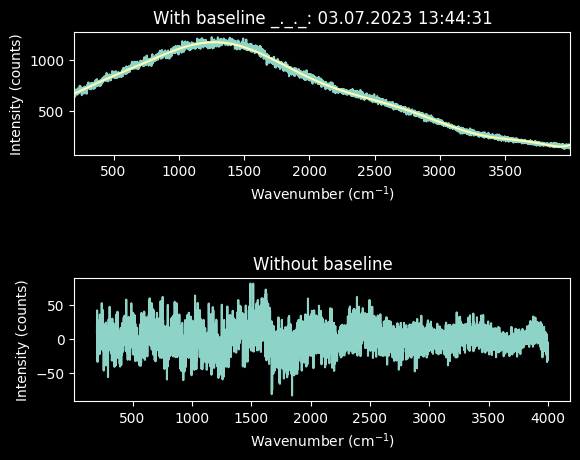

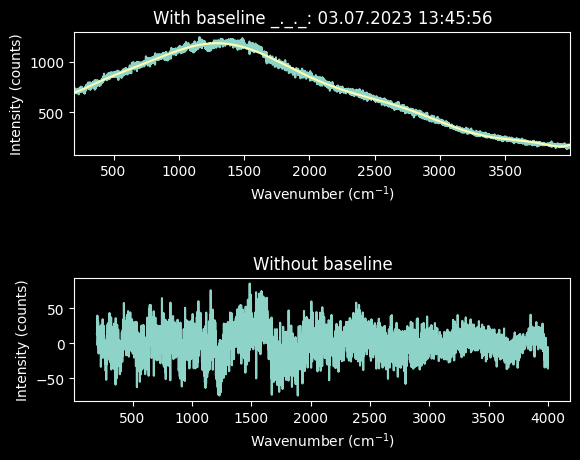

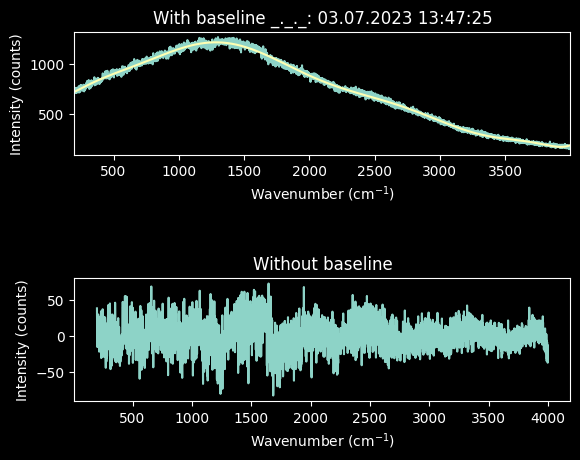

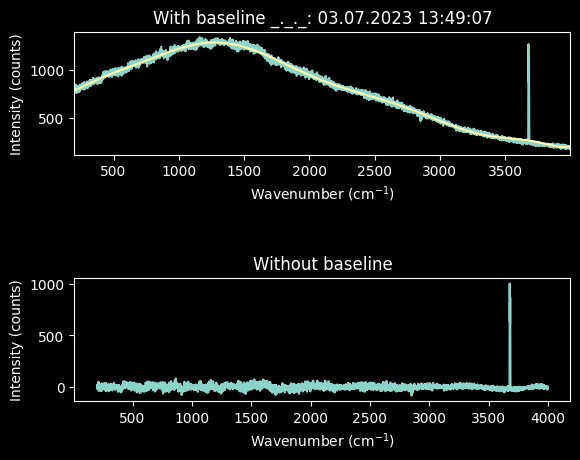

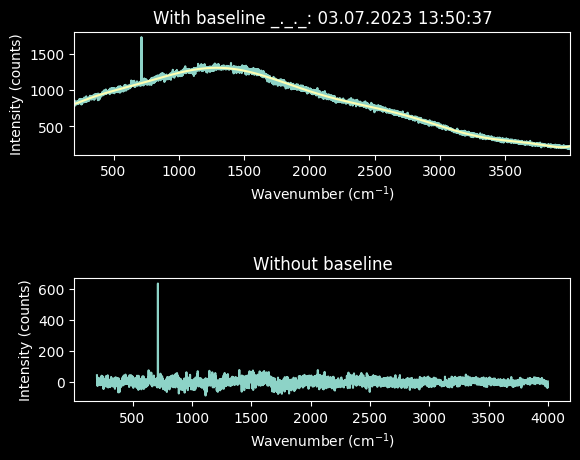

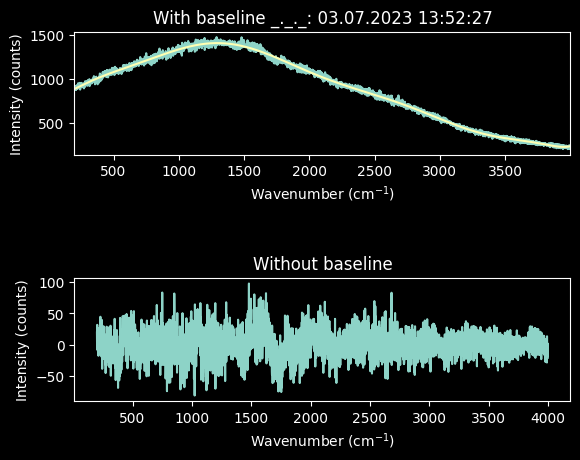

In [ ]:
# Iterating over all the values in the dictionary

for k, v in ramanspecs.items():
    v.polyfit(4000,200,mod='raw',ord=10)

In [ ]:
5+5

10

In [ ]:
interactraman = lambda x: ramanspecs[x].interactive(x=ramanspecs[x].polylx, y=ramanspecs[x].polyly ,mod=True, method='sav_gol')
interactraman('13:52:27')

interactive(children=(IntSlider(value=30, description='Frequency:', max=50, min=1), IntSlider(value=3, descrip…

In [8]:
savgolraman = lambda x: ramanspecs[x].sav_gol(ramanspecs[x].polylx,ramanspecs[x].polyly,window=44,order=4,from_args=True,show=False)
savgolraman('13:52:27')

KeyError: '13:52:27'

In [9]:
aa,bb = ramanspecs['13:52:27'].denoisedx, ramanspecs['13:52:27'].denoisedy

plt.plot(aa,bb,'o',markersize=0.5)

KeyError: '13:52:27'

In [23]:
borrardeldic = lambda keey: ramanspecs.pop(keey)
borrardeldic('13:49:07')

In [17]:
savgolraman = lambda x: ramanspecs[x].sav_gol(ramanspecs[x].polylx,ramanspecs[x].polyly,window=44,order=4,from_args=True,show=False)
savgolraman('13:52:27')

for k, v in ramanspecs.items():
    savgolraman(k)

<Figure size 640x480 with 0 Axes>

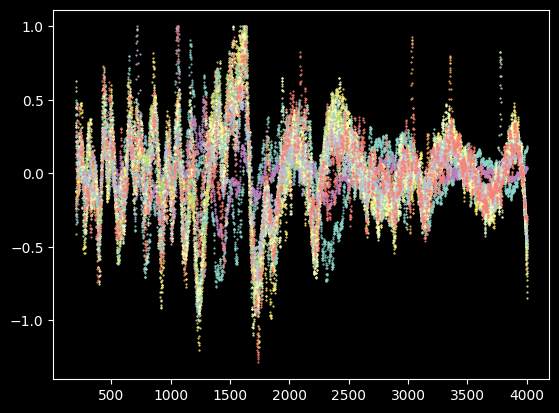

In [25]:
for k, v in ramanspecs.items():
    # Accessing the denoised data to normalize it and plot it
    x, y = v.denoisedx, v.denoisedy
    # Normalizing the data
    yn = y/max(y)
    # Plotting the data
    plt.plot(x,yn,'o',markersize=0.5)
    

In [ ]:
getrspec = lambda keey: ramanspecs[keey]
getrspec('13:27:24').interactive(mod=True, method='poly_fit')

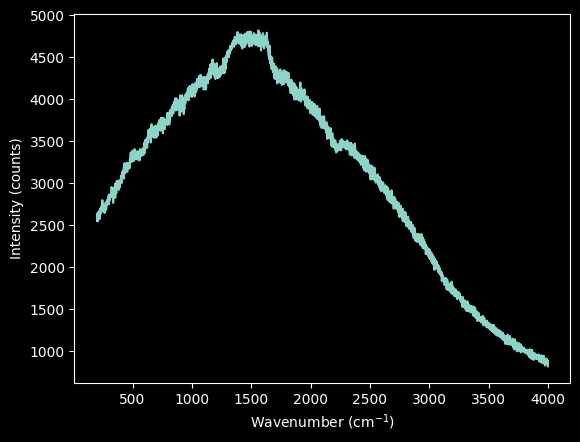

<Figure size 640x480 with 0 Axes>

In [12]:
ploti = lambda keey: ramanspecs[keey].plot()
ploti('13:33:22')

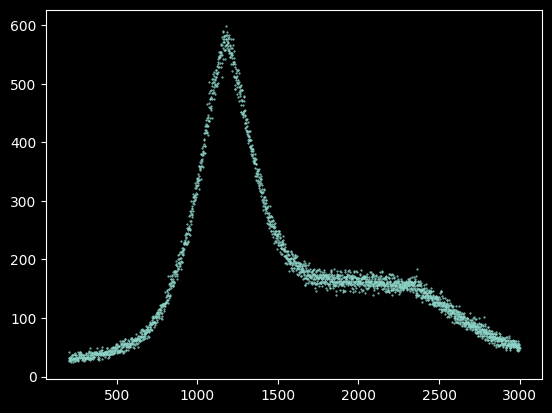

In [9]:
plt.plot(raman.x, raman.y, 'o', markersize=0.5)

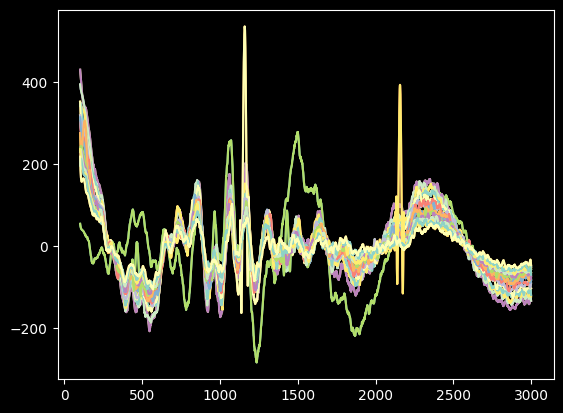

In [45]:
# Each value of the dic is a list, we will plot l[0] vs the normalized savgol_filter((l[1] - l[2]), 30, 3)
# Path: core.ipynb
for k, l in dic.items():
    plt.plot(l[0], savgol_filter((l[1] - l[2]), 50, 5))

# Now we create a video of the plots
# Path: core.ipynb
import cv2

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 1, (640, 480))

for k, l in dic.items():
    plt.plot(l[0], savgol_filter((l[1] - l[2]), 50, 5))
    plt.savefig('temp.png')
    img = cv2.imread('temp.png')
    out.write(img)

# Release everything if job is finished
out.release()
cv2.destroyAllWindows()

    

In [6]:
print('PATH             ', 'ACQUIRED', sep='\t')
print('----             ', '--------', sep='\t')

ramanspecs = {}

for f in files:
    r = RamanSpectrum(f)
    ramanspecs[r.acquired.split('_')[1]] = r
    print(r.filepath, r.acquired, sep='\t')

del r, f

PATH             	ACQUIRED
----             	--------
./muestras/mosquito/OR_01.txt	03072023_13:21:19
./muestras/mosquito/OR_02.txt	03072023_13:27:24
./muestras/mosquito/OR_03.txt	03072023_13:29:37
./muestras/mosquito/OR_04.txt	03072023_13:31:24
./muestras/mosquito/OR_05.txt	03072023_13:33:22
./muestras/mosquito/OR_06.txt	03072023_13:35:01
./muestras/mosquito/OR_07.txt	03072023_13:36:36
./muestras/mosquito/OR_08.txt	03072023_13:38:08
./muestras/mosquito/OR_09.txt	03072023_13:41:30
./muestras/mosquito/OR_10.txt	03072023_13:43:06
./muestras/mosquito/OR_11.txt	03072023_13:44:31
./muestras/mosquito/OR_12.txt	03072023_13:45:56
./muestras/mosquito/OR_13.txt	03072023_13:47:25
./muestras/mosquito/OR_14.txt	03072023_13:49:07
./muestras/mosquito/OR_15.txt	03072023_13:50:37
./muestras/mosquito/OR_16.txt	03072023_13:52:27


In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

def fit_raman(raman):
    # Generate some sample data
    x_ = raman.x
    y_ = raman.y

    # Fit the data to the Gaussian function
    popt, pcov = curve_fit(gaussian, x_, y_, p0=[100, 100, 100])

    # Retrieve the optimized parameters
    amplitude, mean, stddev = popt

    y_fit = gaussian(x_, amplitude, mean, stddev)
    y_new = y_ - y_fit

    # Plot the original data and the fitted curve
    plt.plot(x_, y_new - min(y_new) , 'r-', color='cyan',label='Data')
    # plt.plot(xf, y_fit,color='red', label='Fit')
    raman.setprops(x_, 'x_b')
    raman.setprops(y_new - min(y_new), 'y_b')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(raman.acquired)
    plt.show()
    return x_, y_new - min(y_new)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(x, y, threshold=3):
    # Calculate the mean and standard deviation
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_std, y_std = np.std(x), np.std(y)

    # Compute the Z-scores for each point
    x_z_scores = np.abs((x - x_mean) / x_std)
    y_z_scores = np.abs((y - y_mean) / y_std)

    # Find the indices of points with Z-scores greater than the threshold
    outlier_indices = np.where((x_z_scores > threshold) | (y_z_scores > threshold))[0]

    # Remove the outliers
    x_filtered = np.delete(x, outlier_indices)
    y_filtered = np.delete(y, outlier_indices)

    return x_filtered, y_filtered


# Detect and remove outliers

def plot_removed(r,t_):
    x_filtered, y_filtered = remove_outliers(r.props['x_b'], r.props['y_b'], threshold=t_)
    r.setprops(x_filtered, 'x_filtered')
    r.setprops(y_filtered, 'y_filtered')

    # Plotting before and after removing outliers
    plt.figure(figsize=(10, 4))

    xinitial = r.props['x_b']
    yinitial = r.props['y_b']

    plt.subplot(1, 2, 1)
    plt.plot(xinitial, yinitial)
    plt.title('Before Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.subplot(1, 2, 2)
    plt.plot(x_filtered, y_filtered)
    plt.title('After Removing Outliers')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()

In [10]:
ramanspecs.pop('12:03:20')
ramanspecs.pop('12:10:13')

In [11]:
for e in ramanspecs.keys():
    print(e)

11:49:04
11:50:00
11:52:10
11:53:08
11:54:33
11:55:34
11:56:20
11:57:19
11:58:14
11:59:11
12:04:10
12:05:00
12:06:11
12:07:11


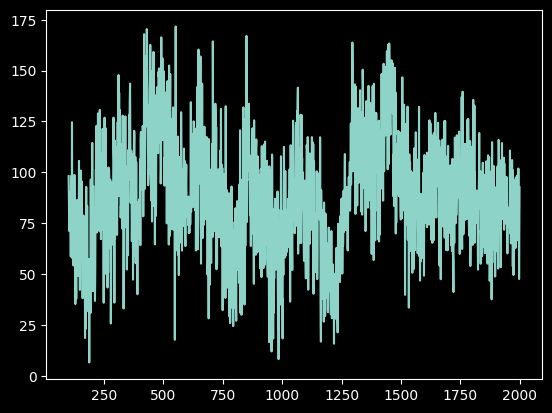

In [12]:
test = ramanspecs['12:07:11']
plt.plot(test.props['x_filtered'], test.props['y_filtered'])

In [15]:
from scipy.signal import savgol_filter

def plot_savinormalized(raman_object): 
    u = raman_object.props['x_filtered']
    v = raman_object.props['y_filtered']
    vhat = savgol_filter(v, 51, 3) # window size 51, polynomial order 3
    # Ploting the data with h and w as width and height respectively
    h = 5
    w = 20

    ########################################

    # Find the maximum y-value
    max_y = np.max(vhat)

    # Normalize the y-values
    normalized_y = np.divide(vhat, max_y)

    ########################################

    plt.figure(figsize=(w, h))
    plt.title(raman_object.acquired)
    plt.plot(u, normalized_y, color='red')
    raman_object.setprops(u, 'x_proposed')
    raman_object.setprops(normalized_y, 'y_proposed')
    plt.savefig('./vid50/{}.png'.format(raman_object.acquired))


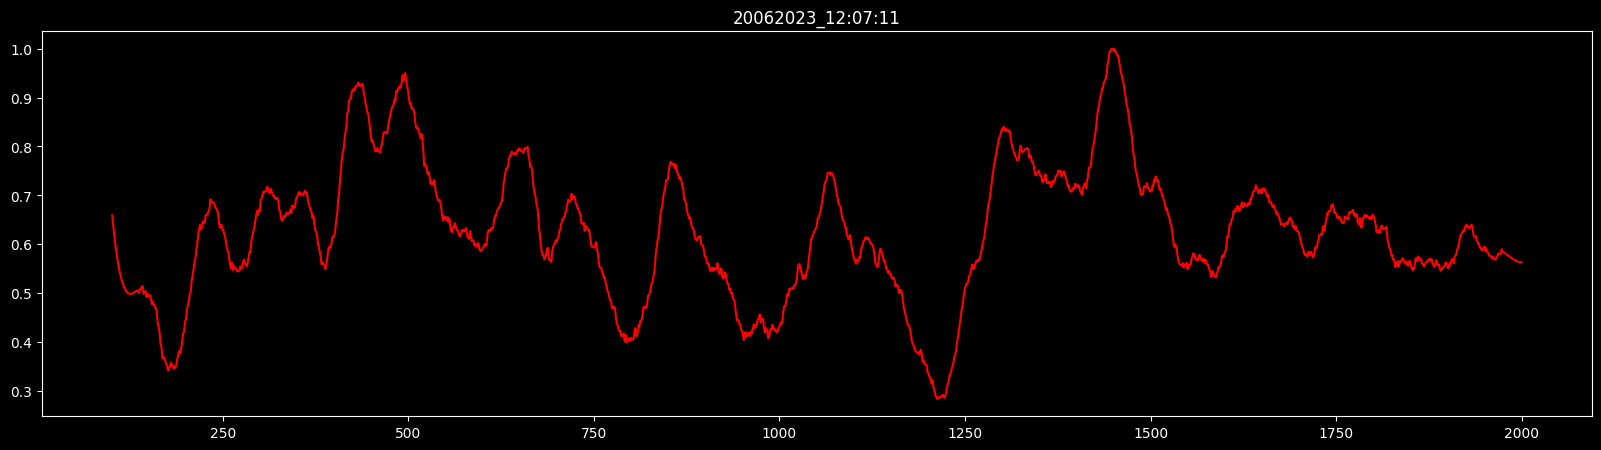

In [16]:
plot_savinormalized(test)

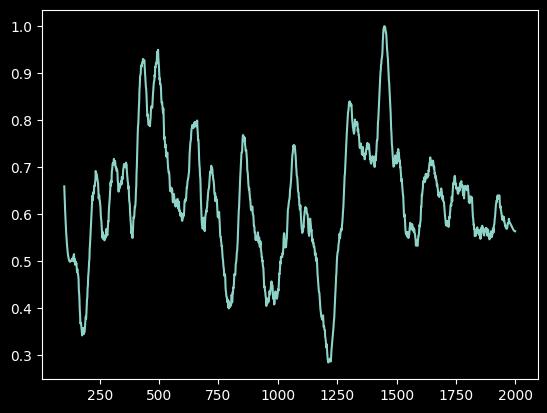

In [17]:
plt.plot(test.props['x_proposed'], test.props['y_proposed'])

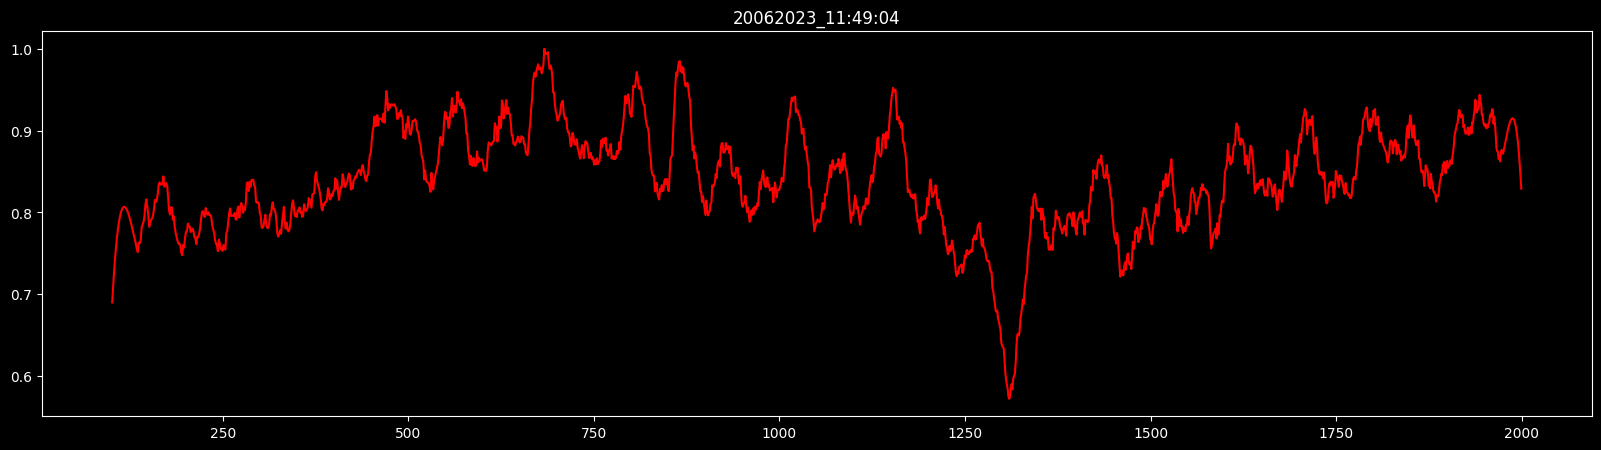

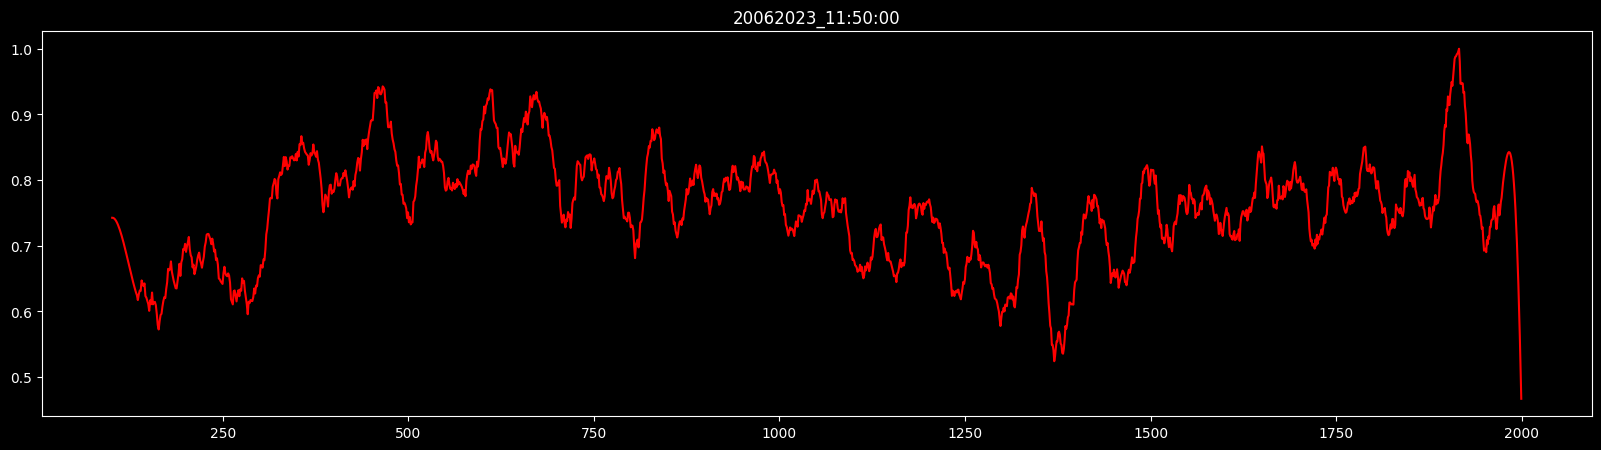

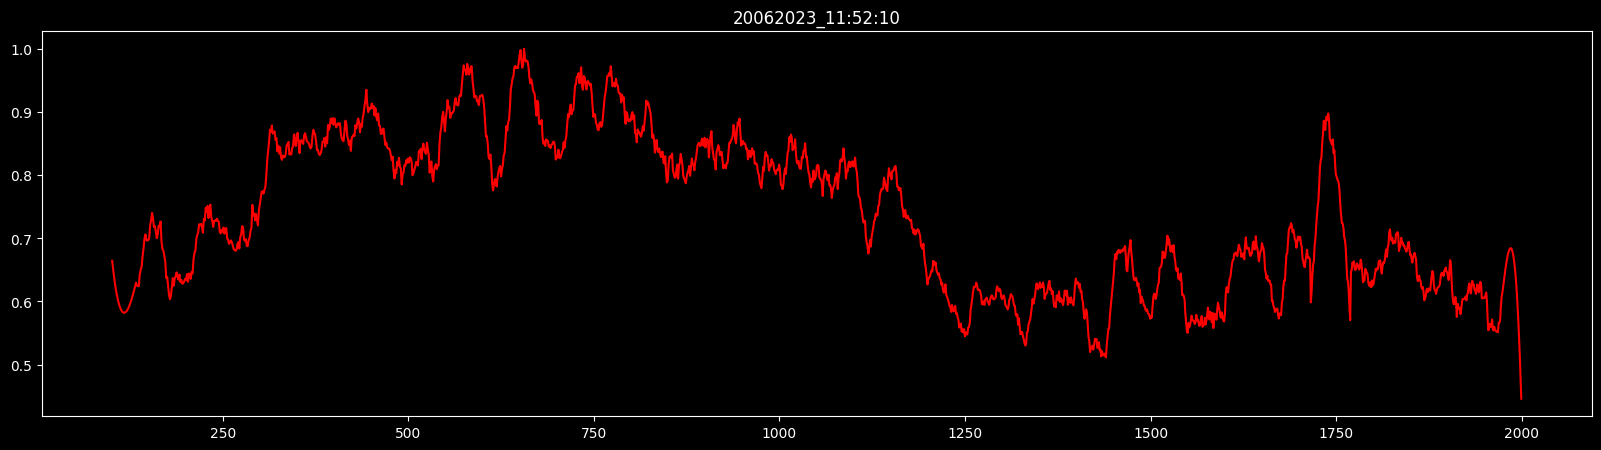

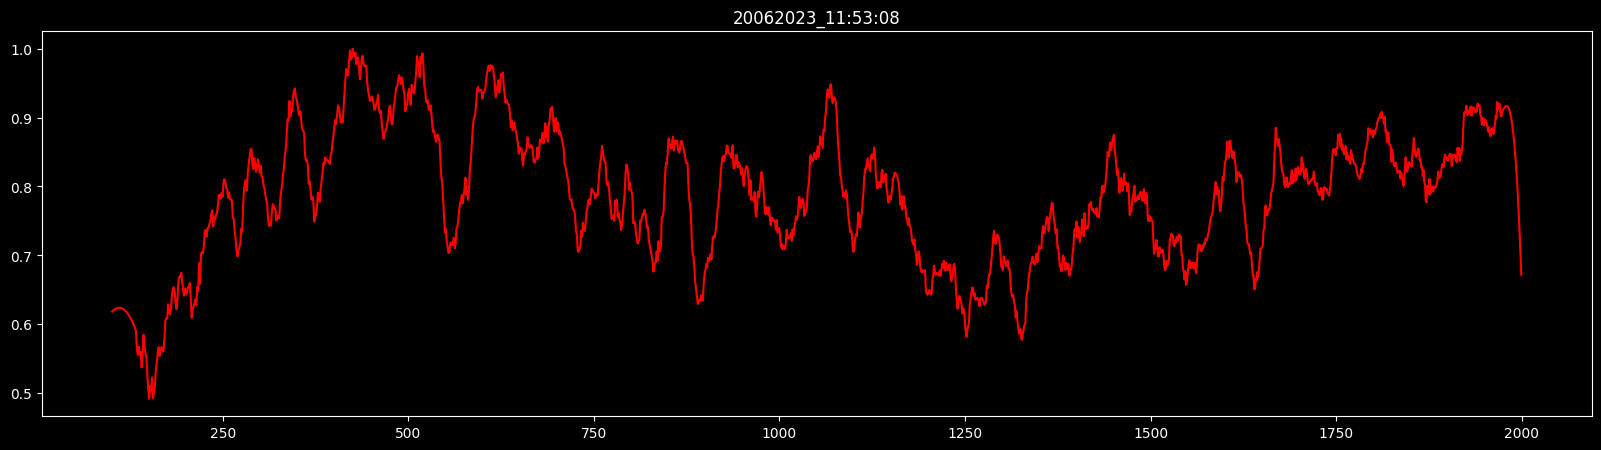

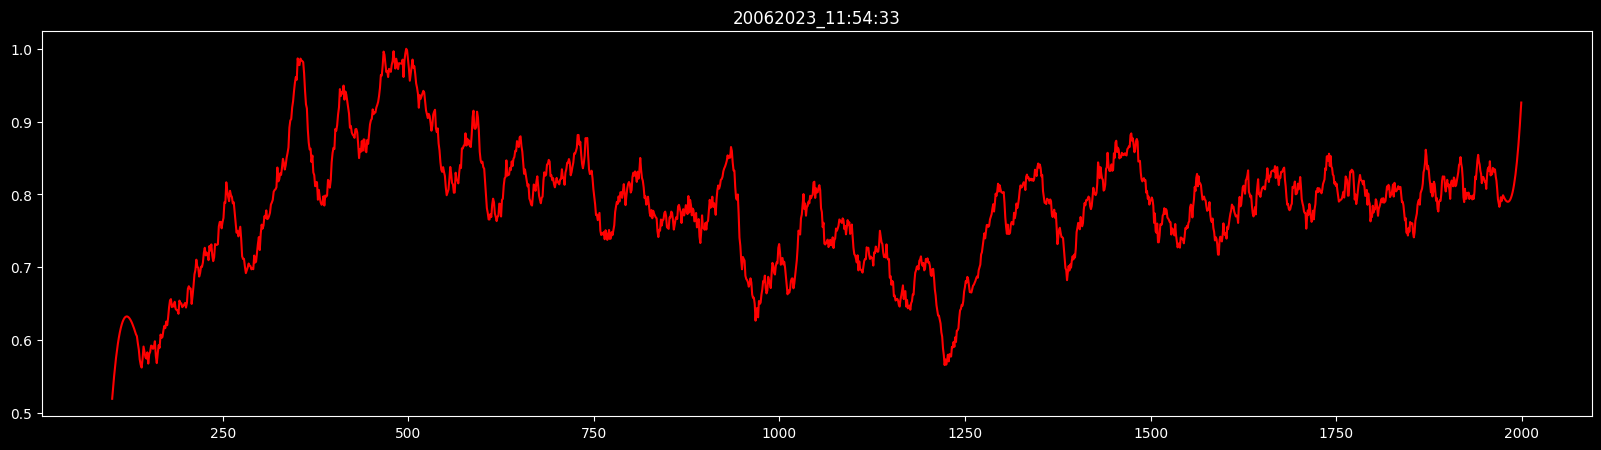

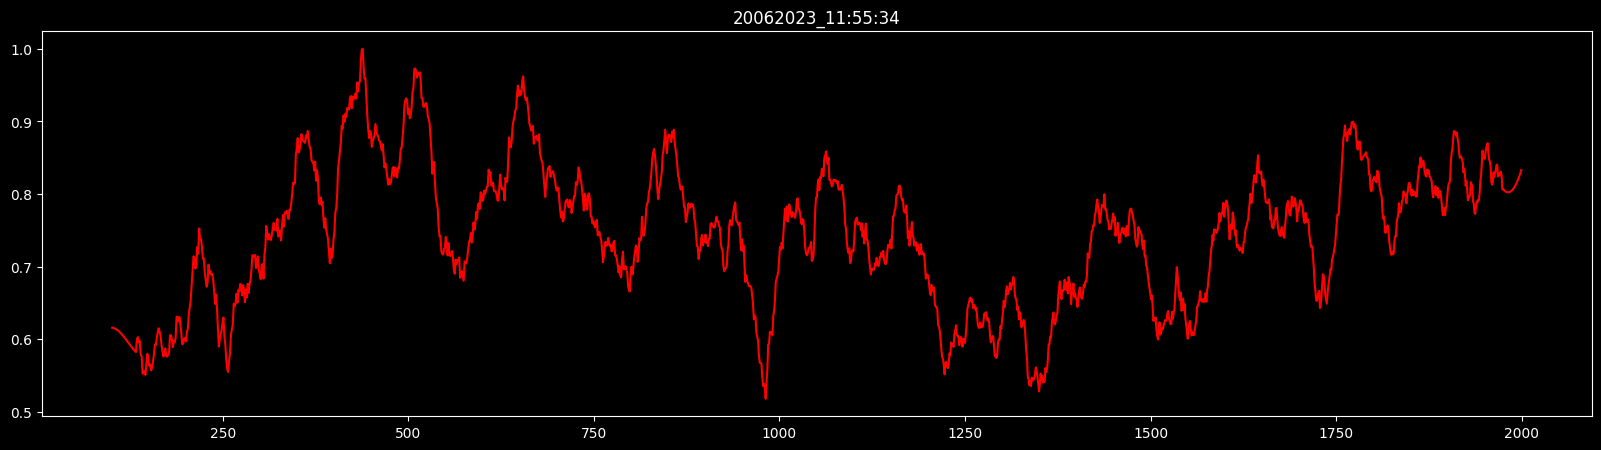

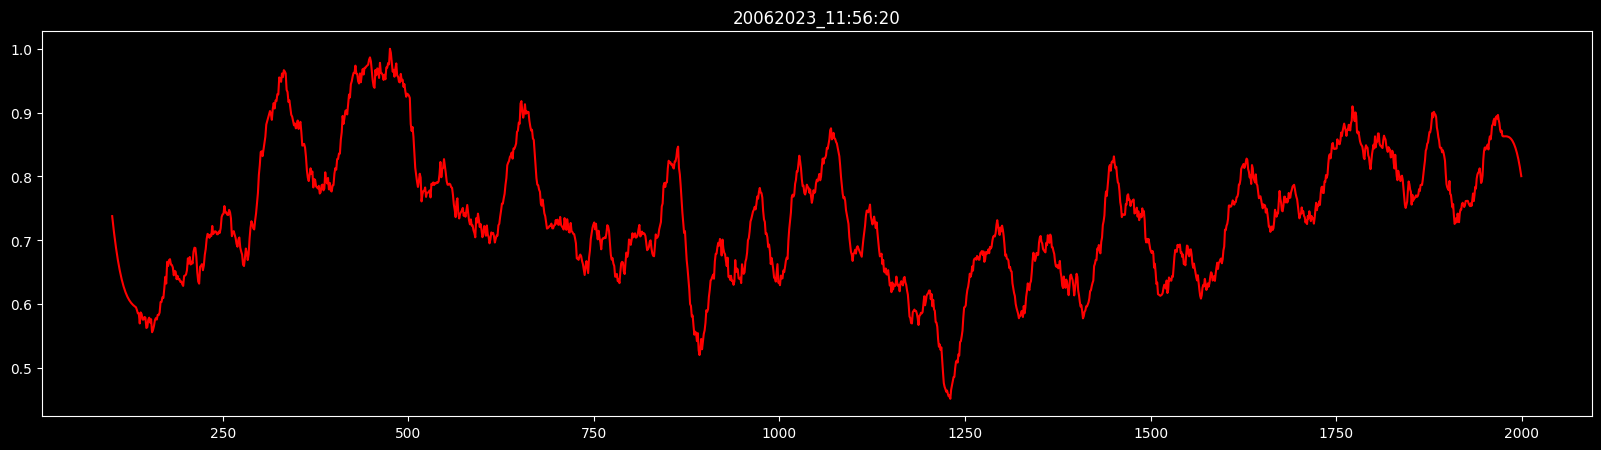

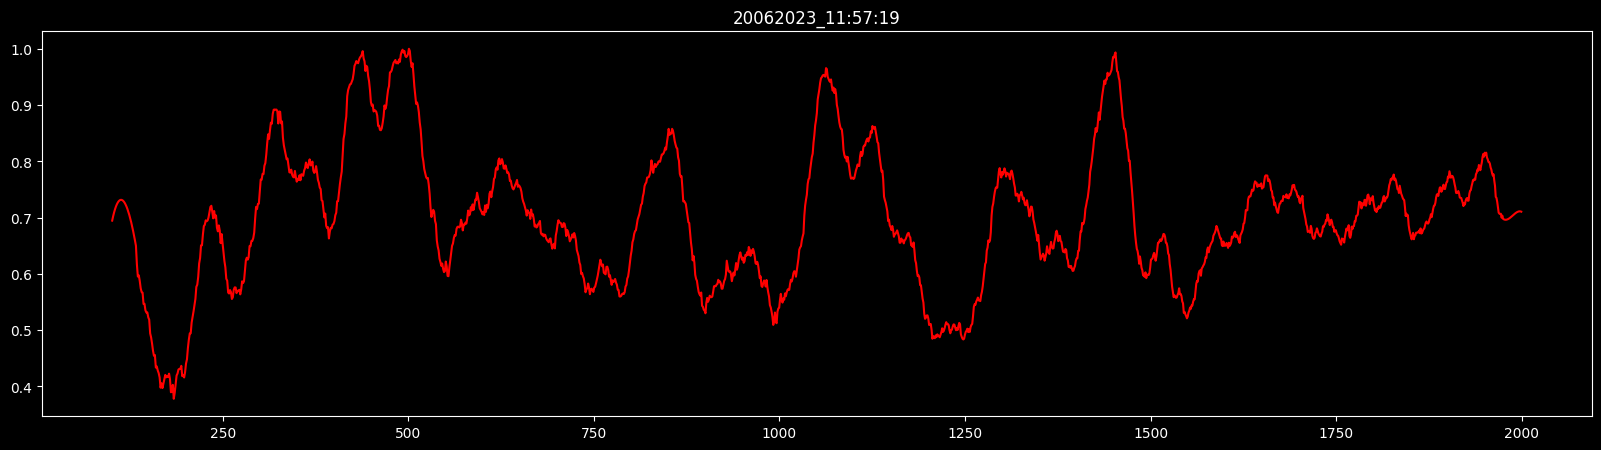

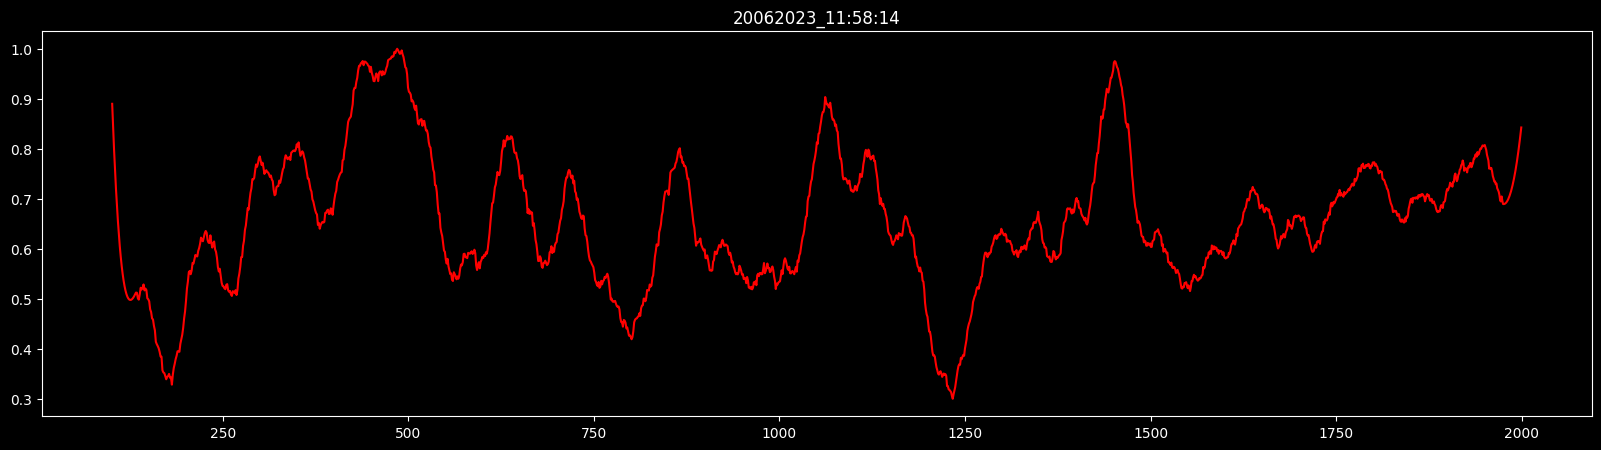

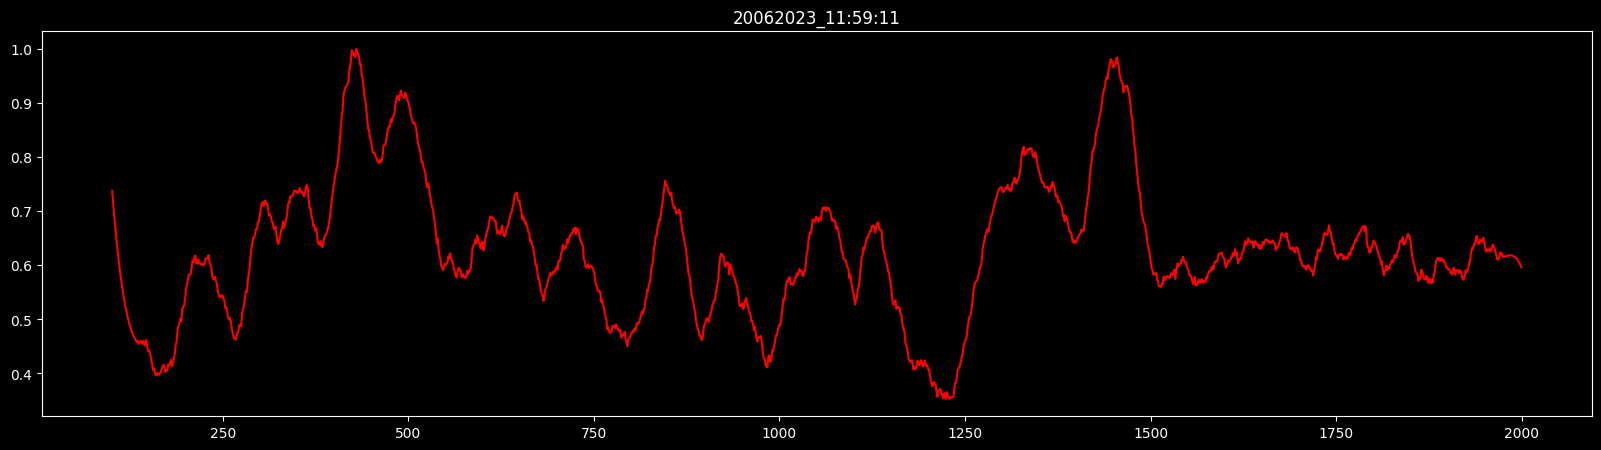

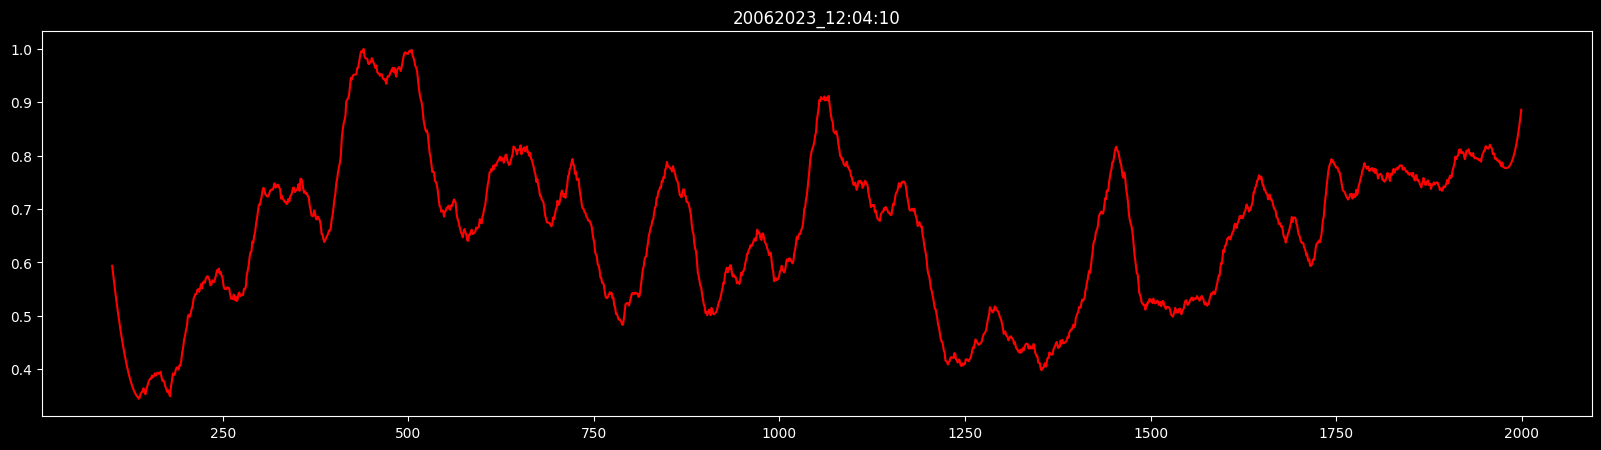

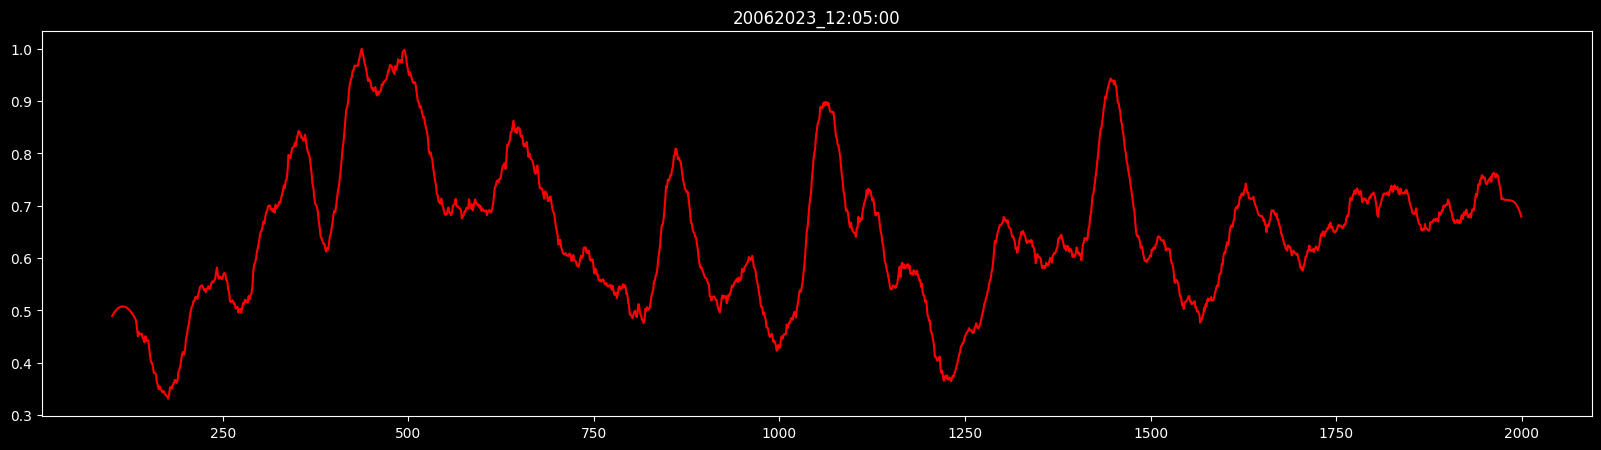

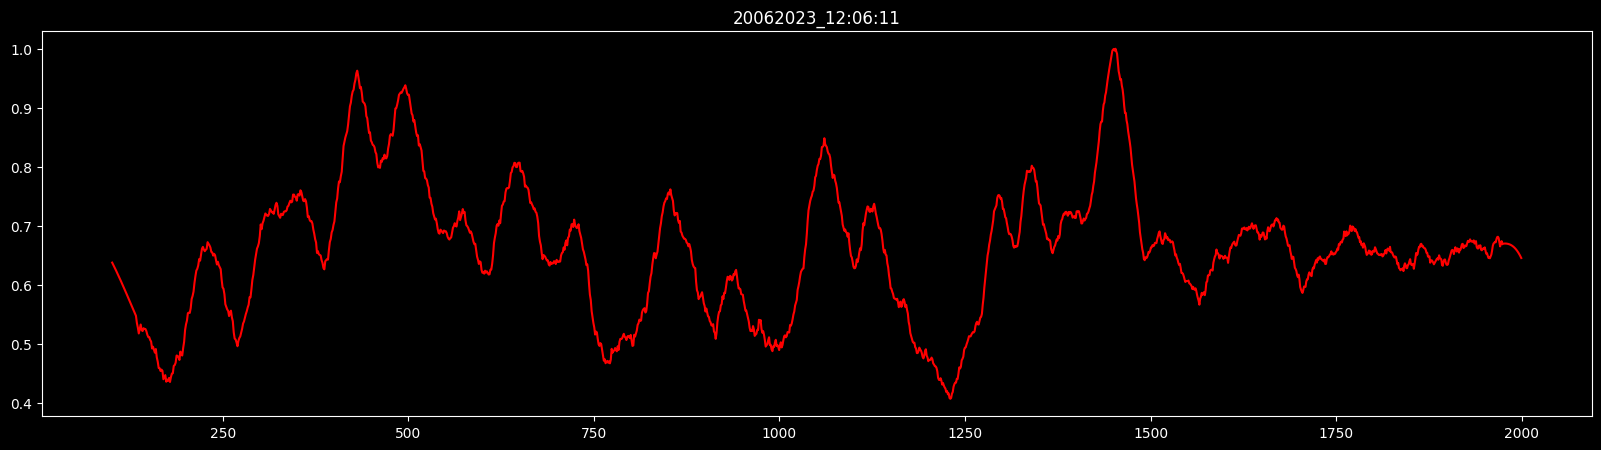

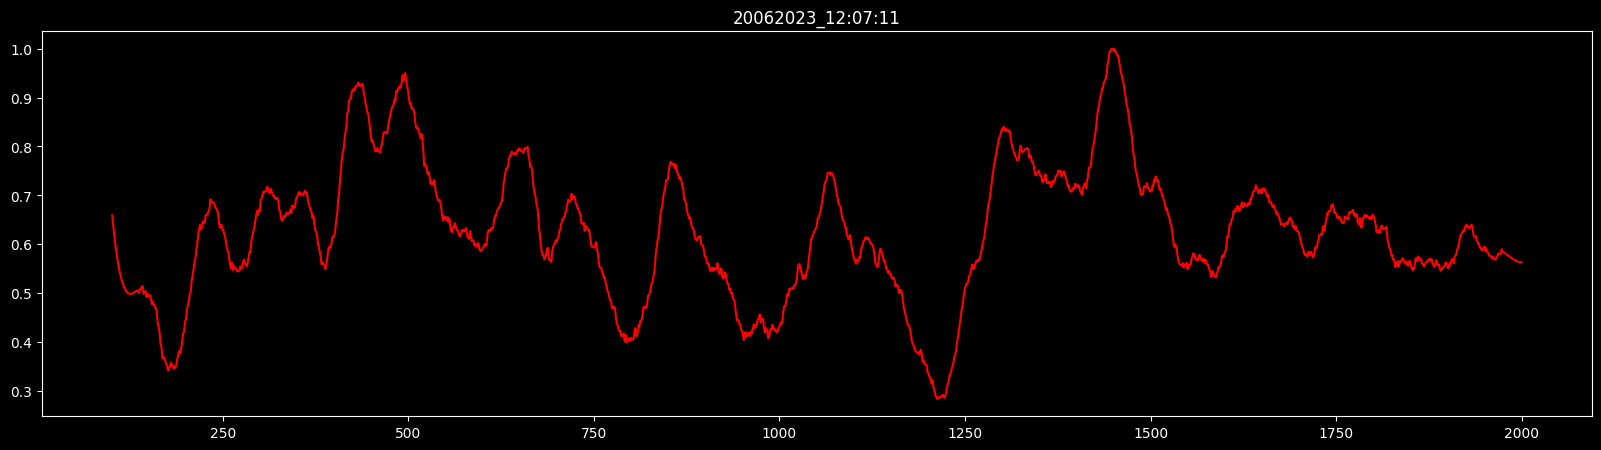

In [18]:
for ramob in ramanspecs.values():
    plot_savinormalized(ramob)

In [19]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt


In [43]:
test.props['x_proposed']

array([ 101.054,  102.338,  103.621, ..., 1997.41 , 1998.39 , 1999.37 ])

In [21]:
data = []

for v in ramanspecs.values():
    data.append(v.props['y_proposed'])

In [27]:
for e in data:
    print(e.shape)

(1686,)
(1689,)
(1692,)
(1690,)
(1690,)
(1693,)
(1691,)
(1685,)
(1691,)
(1686,)
(1687,)
(1690,)
(1686,)
(1690,)


In [32]:
# Find the minimum length of the observations
min_length = min(len(observation) for observation in data)

# Reshape the observations
reshaped_data = [observation[:min_length] for observation in data]


In [34]:
for e in reshaped_data:
    print(type(e))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
# Stack the observations vertically to form a matrix
matrix = np.vstack(reshaped_data)

# Perform SVD
U, S, Vt = svd(matrix)


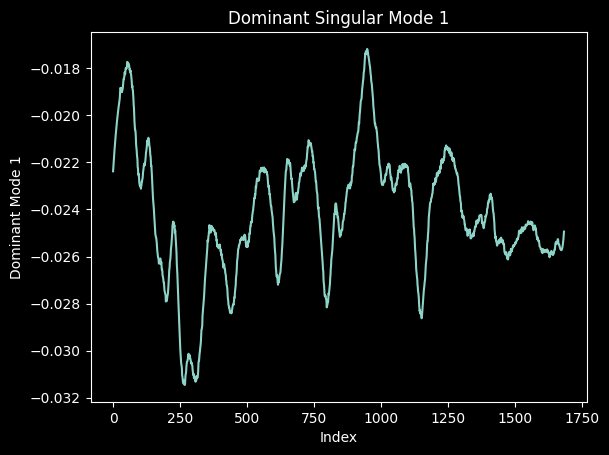

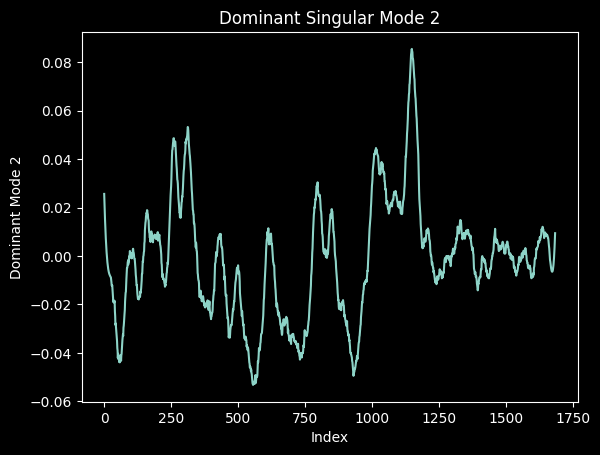

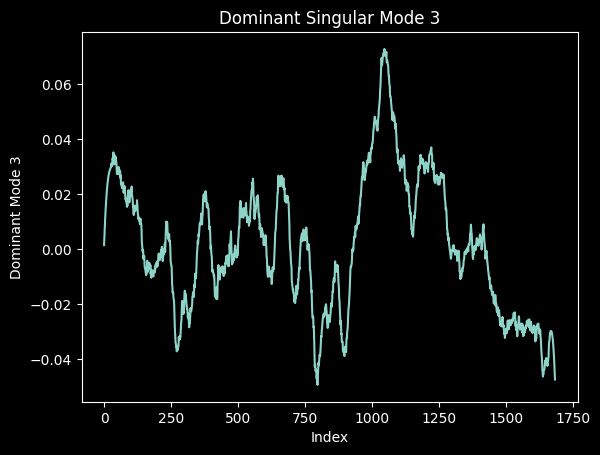

In [37]:
num_modes = 3  # Number of dominant modes to plot

# Plot the dominant singular modes
for i in range(num_modes):
    plt.figure()
    plt.plot(Vt[i, :])  # Right singular vectors contain the modes
    plt.xlabel('Index')
    plt.ylabel(f'Dominant Mode {i+1}')
    plt.title(f'Dominant Singular Mode {i+1}')
    plt.show()


In [44]:
w = test.props['x_proposed']

In [45]:
# Assuming `w` is an array of wavelengths corresponding to the data points

# Choose the index of the dominant singular mode that represents the signal
signal_mode_index = 0

# Extract the dominant singular mode
signal_mode = Vt[signal_mode_index, :]

# Calculate the noise mode as the sum of all other singular modes
noise_mode = np.sum(Vt[signal_mode_index+1:, :], axis=0)

# Calculate the reconstructed signal by multiplying the singular values and singular vectors
reconstructed_signal = U[:, signal_mode_index] * S[signal_mode_index] * signal_mode

# Calculate the reconstructed noise by multiplying the singular values and singular vectors of noise modes
reconstructed_noise = np.sum(U[:, signal_mode_index+1:] * S[signal_mode_index+1:, np.newaxis] * Vt[signal_mode_index+1:, :], axis=1)

# Calculate the signal-to-noise ratio (SNR) for each wavelength
snr = reconstructed_signal / reconstructed_noise

# Plot the SNR
plt.plot(w, snr)
plt.xlabel('Wavelength')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('SNR vs. Wavelength')
plt.show()


ValueError: operands could not be broadcast together with shapes (14,) (1685,) 

In [23]:
import os
import cv2

def create_video_from_images(keyword,image_folder, output_path, frame_duration):
    # Get a list of all image files in the specified folder and its subfolders
    image_files = []
    for root, dirs, files in os.walk(image_folder):
        if keyword in root:
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_files.append(os.path.join(root, file))

    # Sort the image files alphabetically
    image_files.sort()

    # Initialize the video writer
    frame_width, frame_height = 0, 0
    video_writer = None

    # Iterate over each image file
    for i in range(0,10):
        for image_file in image_files:
            # Read the image
            image = cv2.imread(image_file)

            # Get the frame size from the first image
            if frame_width == 0 and frame_height == 0:
                frame_height, frame_width, _ = image.shape

            # Create the video writer on the first iteration
            if video_writer is None:
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')
                video_writer = cv2.VideoWriter(output_path, fourcc, 1000 // frame_duration, (frame_width, frame_height))

            # Write the image to the video for the specified duration
            for _ in range(frame_duration):
                video_writer.write(image)

    # Release the video writer
    if video_writer is not None:
        video_writer.release()

    print(f"Video created successfully at: {output_path}")


# Specify the folder path containing the images
image_folder_path = './vid50/p1/'

# Specify the output video file path
output_video_path = 'm50p1video.mp4'

# Specify the duration of each frame in milliseconds
frame_duration = 15  # 100 milliseconds = 0.1 seconds

# Call the function to create the video
create_video_from_images('.',image_folder_path, output_video_path, frame_duration)

Video created successfully at: m50p1video.mp4


In [19]:
import os
import cv2

def create_video_from_images(keyword, image_folder, output_path, frame_duration):
    # Get a list of all image files in the specified folder and its subfolders
    image_files = []
    for root, dirs, files in os.walk(image_folder):
        if keyword in root:
            for file in files:
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_files.append(os.path.join(root, file))

    # Sort the image files alphabetically
    image_files.sort()

    # Initialize the video writer
    frame_width, frame_height = 0, 0
    video_writer = None

    # Create the video writer on the first iteration
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_path, fourcc, 1000 // frame_duration, (frame_width, frame_height))

    # Iterate over the desired number of repetitions
    for _ in range(5):
        # Iterate over each image file
        for image_file in image_files:
            # Read the image
            image = cv2.imread(image_file)

            # Get the frame size from the first image
            if frame_width == 0 and frame_height == 0:
                frame_height, frame_width, _ = image.shape

            # Write the image to the video for the specified duration
            for _ in range(frame_duration):
                video_writer.write(image)

    # Release the video writer
    if video_writer is not None:
        video_writer.release()

    print(f"Video created successfully at: {output_path}")


# Specify the folder path containing the images
image_folder_path = './vid50/'

# Specify the output video file path
output_video_path = './m250video.mp4'

# Specify the duration of each frame in milliseconds
frame_duration = 30  # 100 milliseconds = 0.1 seconds

# Call the function to create the video
create_video_from_images('.', image_folder_path, output_video_path, frame_duration)


Video created successfully at: ./m250video.mp4
